# AI Fusion: An Epic Journey in Problem-Solving

## Case Study Introduction

This case study focuses on one of the leading Indian private sector banks' endeavors to enhance personal loan campaigns through Data Exploration and Predictive Modeling.

<image src = "bank.jpg">

## Market Context

In the dynamic landscape of the Indian banking sector, competition is fierce, and customer preferences constantly evolve. The personal loan market in India is a $20+ billion industry with interest rates ranging from 10% to 20%. This market primarily attracts younger working professionals who often apply online, while lenders face competition, credit scoring challenges, and regulatory oversight.

With a network of 500+ branches, our client operates in a highly competitive market where customer acquisition, retention, and cross-selling are critical for sustained growth. India’s diverse economic and cultural landscape necessitates a flexible and data-driven marketing approach. Understanding and catering to the specific financial needs of a large and diverse customer base is essential for our client's continued success.

With a majority of customers being depositors, the bank’s market presence is solidified as a trusted repository for savings. Yet, the bank faces a challenge in diversifying its services and engaging these depositors in lucrative products like personal loans, which require a different marketing strategy. The bank's market context includes a quest for innovative marketing techniques to target potential customers effectively.

## Bank Background

Our client, a leading Indian bank, is a prominent player in India's financial sector. With a reputation for safety and reliability, the bank has established a significant foothold in the Indian banking industry.

- **Branches:** Operates with a strong presence, boasting over 300 branches nationwide.
- **Customer Base:** The bank's customer base surpasses 11.5 million individuals, primarily characterized as depositors.
- **Services:** The bank’s proficiency in accumulating and preserving deposits serves as a financial custodian to millions.

The bank sees this as an opportunity to capitalize on the trust and diversify its portfolio by offering personal loans to depositors. The bank's rich history, extensive reach, and solid foundation provide a solid backdrop for leveraging data-driven marketing strategies to explore new avenues and enhance customer engagement.

## Business Challenge

<image src = "loan.jpg">

The primary challenge faced by our client is to identify potential customers within its vast customer base who are likely to accept personal loan offers. This challenge involves understanding the factors that influence a customer's decision to take a personal loan and developing a data-driven strategy to target these potential customers effectively. The bank aims to increase the success rate of its marketing campaigns by refining its approach.

## Starting the Project!

## Importing required libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

## Loading the Dataset

In [2]:
#Loading the Dataset
bank_data = pd.read_csv('loan_dataset.csv')

## Exploratory Data Analysis

#### Understanding the dataset and its values

In [3]:
bank_data.head()

,Unnamed: 0,ID,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,0,10001,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,1,10002,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no
2,2,10003,110014,37,1.0,Under Graduate,15.0,88000,0,no,no,no,no
3,3,10004,110003,33,1.0,Graduate,9.0,800000,0,no,no,no,no
4,4,10005,110004,33,4.0,Graduate,8.0,360000,0,no,no,no,no


It seems that the dataset had one serial number column, without any column name, at the starting position.<br>
It is unnecessary to us and will be removed.

In [4]:
#Removing the first column
df = bank_data.drop(columns='Unnamed: 0')

#### From the first five rows of the loan dataset, we can understand that there are 11 columns and in these 11 columns<br>

There are 5 continuos columns.<br>
-> ID<br>
-> Pin-code<br>
-> age<br>
-> Fam members<br>
-> T.Experience<br>
-> Income<br><br>
<br>There are 5 binary classification columns, namely<br>
-> Mortgage<br>
-> Fixed Deposit<br>
-> Demat<br>
-> Net Banking<br>
-> Loan<br>
<br>
Finally, there is one categorical column of Education

#### Now lets perform deeper checking of the data and even Data Cleaning if required

Checking for missing values

In [5]:
print(df.isnull().sum())

ID               0
Pin-code         0
age              0
Fam members      0
Education        0
T.Experience     0
Income           0
Mortgage         0
Fixed Deposit    0
Demat            0
Net Banking      0
Loan             0
dtype: int64


From this, we can see that, there is no missing data.<br>
Dataset is very well made.

### We will now start transforming our data into what the model can understand and learn from

##### The first hurdle we will tackle, are <u>the binary categorical columns<u>

In [6]:
bin_ca = df[['Fixed Deposit', 'Demat', 'Net Banking']]
bin_ca.head()

,Fixed Deposit,Demat,Net Banking
0,no,yes,no
1,no,yes,no
2,no,no,no
3,no,no,no
4,no,no,no


Fixed Deposit<br>
Demat<br>
Net Banking

In [7]:
# Using label encoding for binary categorical columns
le = LabelEncoder()

In [8]:
#Transforming the columns
df['Fixed Deposit'] = le.fit_transform(df['Fixed Deposit'])
df['Demat'] = le.fit_transform(df['Demat'])
df['Net Banking'] = le.fit_transform(df['Net Banking'])

In [9]:
bin_ca = df[['Fixed Deposit', 'Demat', 'Net Banking']]
bin_ca.head()

,Fixed Deposit,Demat,Net Banking
0,0,1,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,0,0


#### Second hurdle is the Education column

To convert this categorical column into something our model can understand, we need to create as many new columns as the types of elements in the column

In [10]:
df['Education'].value_counts()

Education
Under Graduate    2096
Post Graduate     1501
Graduate          1403
Name: count, dtype: int64

The categorical column, Education, contains Three different types of answers, namely
1. Under Graduate
2. Post Graduate
3. Graduate<br>
here, we can see that there is one value known as Graduate but, from what we know about the general education system, there is no such thing as Graduate.<br>
Students are either UG or PG.<br>
Therefore, <br>
Graduate is either a mistype or<br>
it means the people who hold a doctoral degree(Ph.D. equivalent).
It might also mean people who have done some sort of graduation or are degree holders but not Under Graduate level.
but, it can also mean people who hold a degree higher than post graduate but not doctorate level since the number of Graduate are less than both UG & PG. For example, (law degrees) J.D. or (medical degrees) M.D.

However, due to lack of information in this case, I am going to leave it as it is.

Three new columns will be created with values 0 & 1.

In [11]:
# One-hot encoding for Education
df = pd.get_dummies(df, columns=['Education'])

### After the preliminary data transformation, this is how our new top five rows look

In [12]:
df.head()

,ID,Pin-code,age,Fam members,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan,Education_Graduate,Education_Post Graduate,Education_Under Graduate
0,10001,110001,23,4.0,1.0,392000,0,0,1,0,no,False,False,True
1,10002,110014,43,3.0,19.0,272000,0,0,1,0,no,False,False,True
2,10003,110014,37,1.0,15.0,88000,0,0,0,0,no,False,False,True
3,10004,110003,33,1.0,9.0,800000,0,0,0,0,no,True,False,False
4,10005,110004,33,4.0,8.0,360000,0,0,0,0,no,True,False,False


Label Encoding the new education columns

In [13]:
df['Education_Graduate'] = le.fit_transform(df['Education_Graduate'])
df['Education_Post Graduate'] = le.fit_transform(df['Education_Post Graduate'])
df['Education_Under Graduate'] = le.fit_transform(df['Education_Under Graduate'])

In [14]:
df['Loan'] = le.fit_transform(df['Loan'])

In [15]:
df.head()

,ID,Pin-code,age,Fam members,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan,Education_Graduate,Education_Post Graduate,Education_Under Graduate
0,10001,110001,23,4.0,1.0,392000,0,0,1,0,0,0,0,1
1,10002,110014,43,3.0,19.0,272000,0,0,1,0,0,0,0,1
2,10003,110014,37,1.0,15.0,88000,0,0,0,0,0,0,0,1
3,10004,110003,33,1.0,9.0,800000,0,0,0,0,0,1,0,0
4,10005,110004,33,4.0,8.0,360000,0,0,0,0,0,1,0,0


In [16]:
df_ = df[['age', 'Fam members', 'Income', 'Mortgage']]

min_values = df_.min()
max_values = df_.max()

min_max_df = pd.DataFrame({'Min': min_values, 'Max': max_values})
print(min_max_df)

                 Min        Max
age             21.0       65.0
Fam members      1.0        4.0
Income       64000.0  1792000.0
Mortgage         0.0  5080000.0


#### Bank Customer Profile Analysis:
<pre>
1. Age

    <b>Range: 21 to 65 years</b>
    
    Interpretation:
    The bank serves a diverse age group of customers ranging from young adults (21 years old) to individuals after retirement (65 years old). This broad age range suggests that the bank caters to both early-career professionals and those more established in their careers or preparing for retirement.

2. Family Members

    <b>Range: 1 to 4 members</b>

    Interpretation:
    The data shows that the customers have between 1 to 4 family members. This range might indicate that the bank's clients predominantly consist of small to medium-sized families. The bank could primarily focus on targetting the nuclear families.

3. Income

    <b>Range: ₹64,000 to ₹17,92,000</b>

    Interpretation:
    The income levels of the bank's customers vary significantly, from ₹64,000 to ₹17.92 lacs per annum. This wide income range indicates that the bank serves a mix of low-income to high-income customers. The bank may offer different financial products to cater to the various financial capacities of these customers, such as savings accounts, loans, and investment options.

4. Mortgage

    <b>Range: ₹0 to ₹50,80,000</b>

    Interpretation:
    The mortgage values range from ₹0 to ₹50.8 lacs, suggesting that the bank provides mortgage services to customers who have either paid off their loans or have mortgages up to several lacs rupees. This range implies that the bank caters to both homeowners without ongoing mortgage obligations and those with significant real estate investments.
</pre>

## Visualization

##### After the preliminary data cleaning and transformation, we will now try to understand the data deeper and try to ascertain the relationships each variable has.

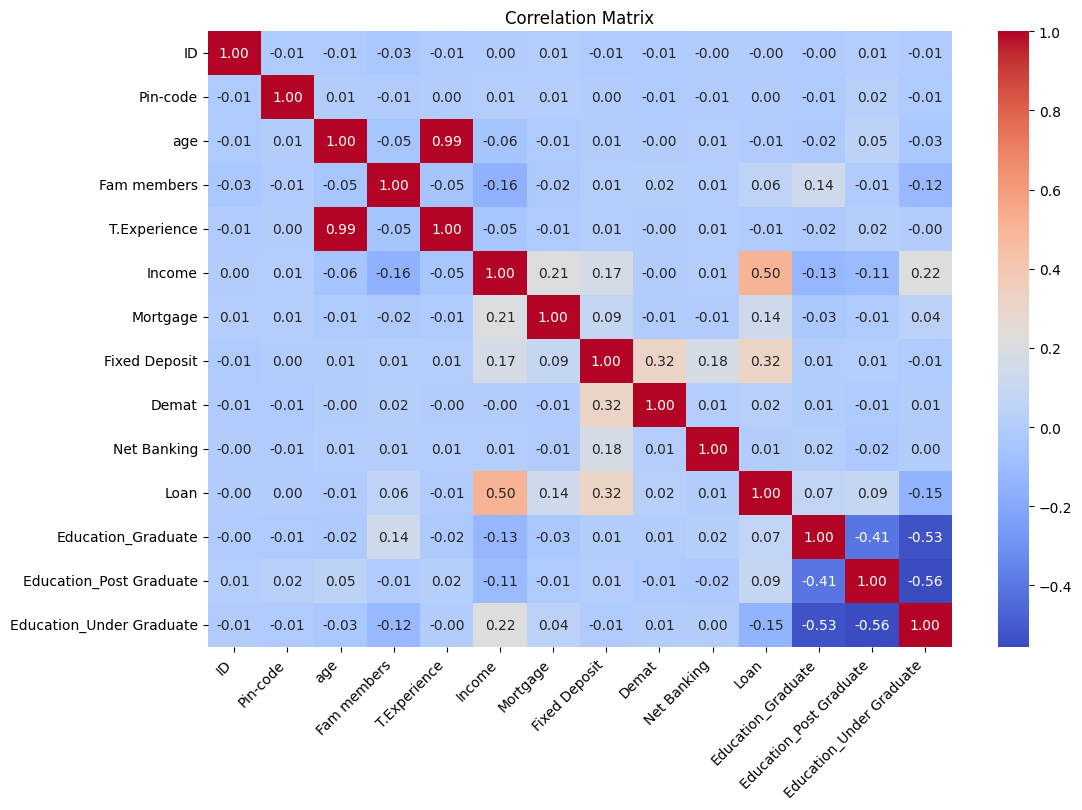

Loan                        1.000000
Income                      0.502462
Fixed Deposit               0.316355
Mortgage                    0.142095
Education_Post Graduate     0.090212
Education_Graduate          0.071491
Fam members                 0.061367
Demat                       0.021954
Net Banking                 0.006278
Pin-code                    0.002344
ID                         -0.000576
T.Experience               -0.007413
age                        -0.007726
Education_Under Graduate   -0.148894
Name: Loan, dtype: float64


In [17]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))  # Increase figure size for readability
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()
# Finding the correlation with the target variable
correlation_with_target = df.corr()['Loan'].sort_values(ascending=False)
print(correlation_with_target)

#### We can infer a few things from this correlation heat map

Individuals with higher incomes are more likely to have larger mortgages, own properties, and invest in financial instruments like fixed deposits and demat accounts.

Education level plays a role in determining income, with higher education often leading to higher earnings.

<pre>
Key Observations Regarding Loan:
<ul>
<li><b><u>Loan and Income</b></u> There's a moderate positive correlation between Loan and Income. This suggests that individuals with <b>higher incomes tend to take out larger loans</b>.

<li><b><u>Loan and Education</b></u> There's a weak positive correlation between Loan and Education_Graduate. 
                    This might indicate that <b>individuals with graduate degrees are slightly more likely to take out loans</b>, possibly for higher education or business ventures.

<li><b><u>Loan and Fixed Deposit</b></u> There's a weak negative correlation between Loan and Fixed Deposit. 
                    This could suggest that <b>individuals with larger fixed deposits might be less likely to take out loans</b>, as they may have alternative sources of funds.
                    
<li><b><u>Loan and Net Banking</b></u> There's a moderate positive correlation between Loan and Net Banking. 
                    This might imply that individuals who are more comfortable with <b>online banking are more likely to apply for loans online</b>, which could lead to <b>higher loan amounts</b>.
</ul>
<pre>

Interpreting the Correlations:
<pre>

Based on these correlations, we might infer that:

Individuals with higher incomes are more likely to take out larger loans, possibly for home purchases, investments, or business ventures.
Online banking might facilitate the loan application process, leading to higher loan amounts.
Individuals with significant savings might be less likely to need loans.

Positive Correlations: The positive correlations between Loan and Income & Loan and Net Banking suggest that these factors might influence the amount or likelihood of taking out a loan.<br>
Negative Correlation: The weak negative correlation between Loan and Fixed Deposit indicates that individuals with substantial savings might be less reliant on loans.

##### However correlation does not also mean causation

While correlations can suggest relationships between variables, they don't prove causation. Further analysis is needed in this case.

### Analyzing how much part does Education plays in recieving loans

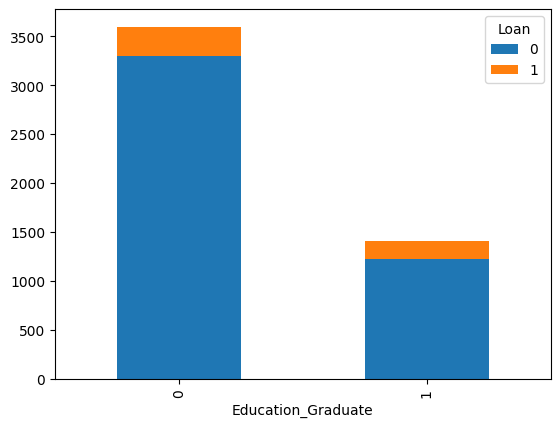

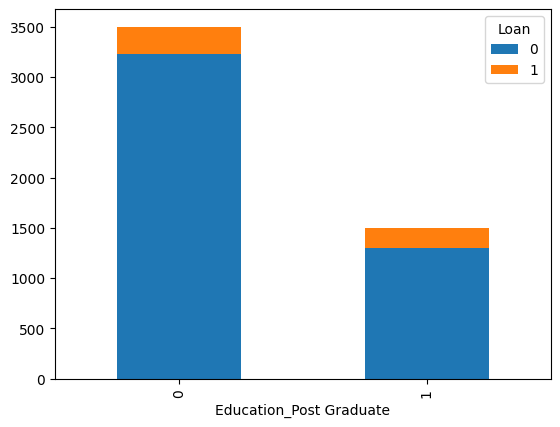

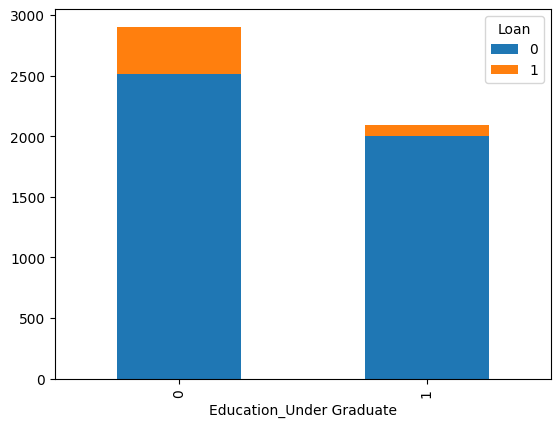

In [18]:
pd.crosstab(df['Education_Graduate'], df['Loan']).plot(kind='bar', stacked=True)
plt.show()
pd.crosstab(df['Education_Post Graduate'], df['Loan']).plot(kind='bar', stacked=True)
plt.show()
pd.crosstab(df['Education_Under Graduate'], df['Loan']).plot(kind='bar', stacked=True)
plt.show()

#### Key Findings:
<ul>
<li>Undergraduates: A higher proportion of individuals who are not undergraduates (category 0) have taken out loans compared to those who are undergraduates (category 1).<br>
<li>Post-Graduates: Similar to undergraduates, a higher proportion of individuals who are not post-graduates (category 0) have taken out loans compared to those who are post-graduates (category 1).<br>
<li>Graduates: Again, a higher proportion of individuals who are not graduates (category 0) have taken out loans compared to those who are graduates (category 1).<br>

<pre>

Based on these observations, there seems to be a consistent trend: <b><u>individuals with lower education levels are more likely to take out loans</b></u>. 

This could be attributed to various factors, such as:
<ul type = "circle">
<li>Financial Need: Individuals with lower education levels might have higher financial needs due to lower incomes.
<li>Creditworthiness: Lower education levels might be associated with lower credit scores, making it more difficult to obtain loans or leading to higher interest rates.
<li>Educational Costs: Individuals with lower education levels might have fewer opportunities for student loans or other forms of financial aid.
</ul></pre>

### Detailed Analysis

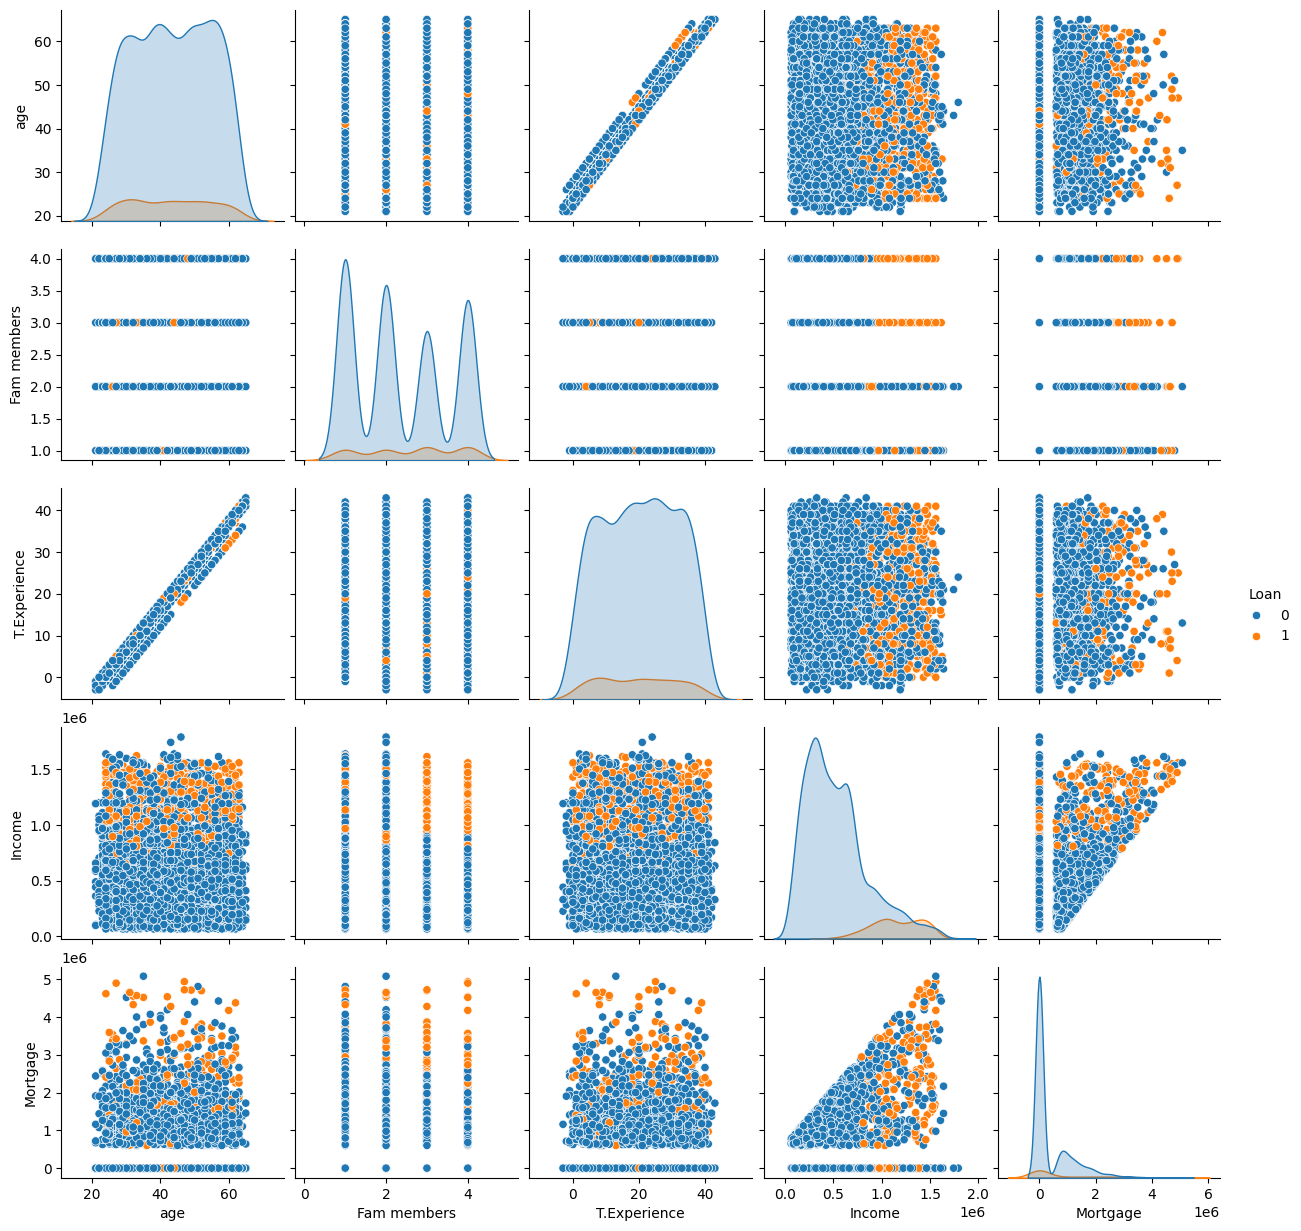

In [19]:
sns.pairplot(df[['age', 'Fam members', 'T.Experience', 'Income', 'Mortgage', 'Loan']], hue='Loan')
plt.show()


##### Key Observations:

<ul type = "circle">
<li><b><u>Distributions</b></u>: The diagonal plots show the distribution of each variable.
<li><b><u>Age</b></u>: Appears to be normally distributed with a <b>peak around 30</b>.
<li><b><u>Fam members</b></u>: Skewed to the right, indicating a <b>few individuals have larger families</b>.
<li><b><u>T.Experience</b></u>: Skewed to the right, suggesting some individuals have significantly more experience.
<li><b><u>Income</b></u>: Skewed to the right, with a few individuals having very high incomes.
<li><b><u>Mortgage</b></u>: Skewed to the right, with a few individuals having very high mortgages.
</ul>

<ul>
<li>Family members and other variables: No clear linear relationships are observed, indicating that family size might not be strongly correlated with other variables in this dataset.
</ul>

### Distribution of Income

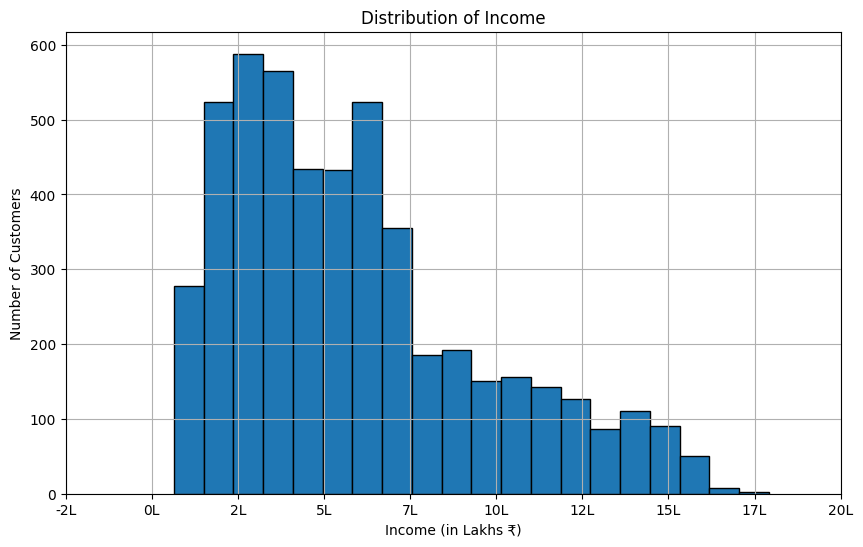

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['Income'], bins=20, edgecolor='k')
plt.title('Distribution of Income')
plt.xlabel('Income (in Lakhs ₹)')
plt.ylabel('Number of Customers')
ax = plt.gca()
ax.set_xticks(ax.get_xticks()) 
ax.set_xticklabels([f'{int(x/100000)}L' for x in ax.get_xticks()]) 
plt.grid(True)
plt.show()

We can see from this histogram that most of the customers are based around <b>2-6 Lacs per annum</b> range.<br>
This indicates that the customer base primarily consists of <b><u>lower to middle income</b></u> groups.

#### Lets look at more detailed analysis of the Income distribution

In [21]:
#Defining income brackets to segregate into different income groups
df_1 = df
bins = [0, 200000, 500000, 1000000, df_1['Income'].max()]
labels = ['Low Income', 'Middle Income', 'Upper Middle Income', 'High Income']
df_1['Income Category'] = pd.cut(df_1['Income'], bins=bins, labels=labels, include_lowest=True)
# Number of customers in each category
income_distribution = df_1['Income Category'].value_counts()
print(income_distribution)

Income Category
Upper Middle Income    1785
Middle Income          1772
High Income             771
Low Income              672
Name: count, dtype: int64


This allows us to see the exact number of customers in the Income section of the dataset.
<br>
This confirms that majority of the customer base exists in the middle income range.

### Distribution of Age

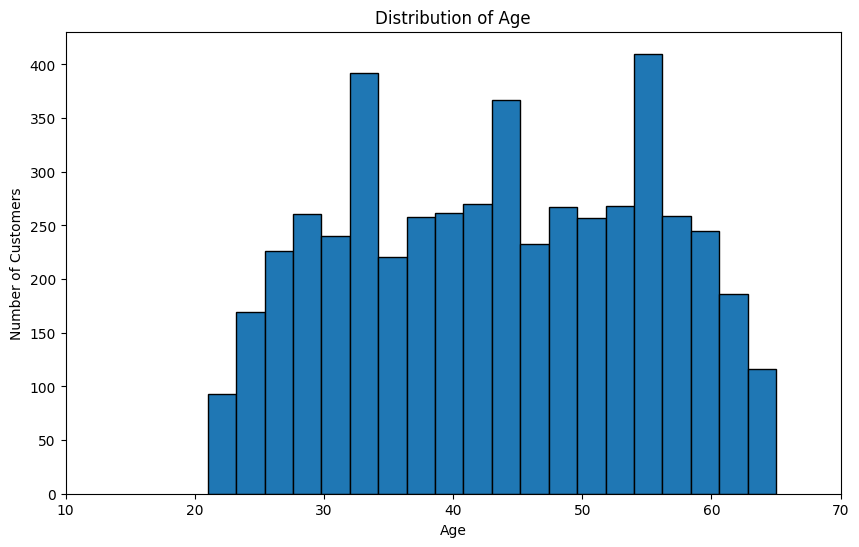

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, edgecolor='k')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
ax = plt.gca()
ax.set_xticks(ax.get_xticks())  
plt.show()

From this histogram, we can conclude that:
<br><ul>
<li> Majority of customer age is  around 30 to 55 years of age.
<li> There are very few customers who are above 60 years of age or below 25 years of age.
</ul>

### Finding Relation between all the different categories

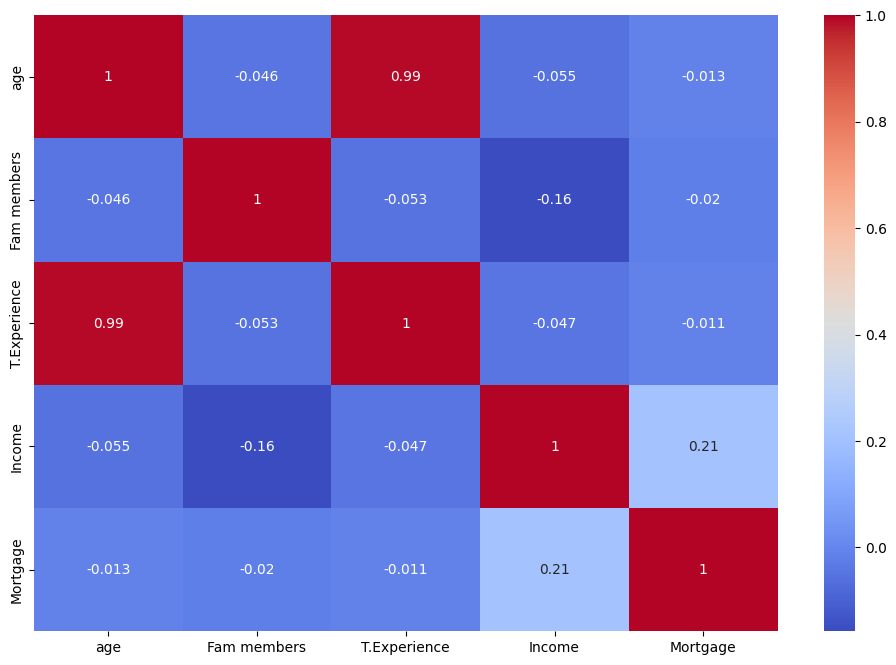

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['age', 'Fam members', 'T.Experience', 'Income', 'Mortgage']].corr(), annot=True, cmap='coolwarm')
plt.show()

<pre>
<ul type = "square">
<li>Income and Mortgage: A moderately strong positive correlation exists between Income and Mortgage, indicating that <b><u>higher income is associated with larger mortgages</b></u>.
<li>Age and T.Experience: There's a strong positive correlation between Age and T.Experience, suggesting that as people get older, they tend to have more experience.
<li>Age and Family Members: There's a weak negative correlation between Age and Family Members.
</pre>

## In short,
<ul>
<li>Bank mostly serves nuclear families(1-4 members)
<li>Ages range from 21 to 65 years and peak around 30 to 55 years of age
<li>Income levels of bank's customers are diverse
<li>Individuals with higher income tend to take out larger loans
<li>Individuals with larger fixed deposits might be less likely to take out loans
<li>Customers who use online banking are more likely to apply for loans online
<li>Individuals with lower education levels are more likely to take out loans
<li>Bank serves customer mostly based around 2 to 6 lacs per annum range while catering to high and low ends too.
</ul>

#### We noticed that major influences on the Loan variable were Income and Mortgage

Let us explore their Box Plots to make sure there are no outliers/skewness

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5b62da3c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5b9fc4e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5b61d7fe0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5b9fc53d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5b9fc5610>],
 'means': []}

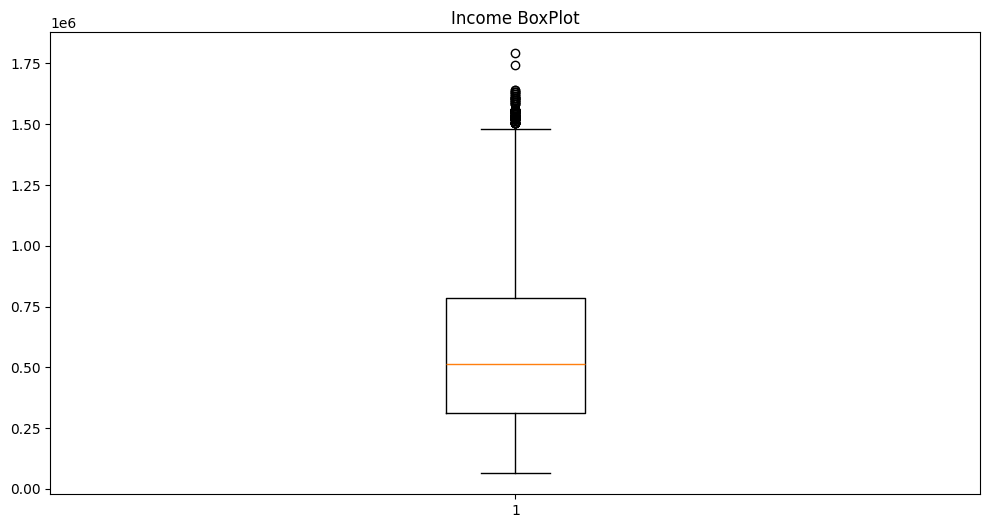

In [24]:
plt.figure(figsize=(12,6))
plt.title("Income BoxPlot")
plt.boxplot(df['Income'])

We notice that Income has some outliers and is skewed slightly

We apply Log Transformation to handle the outliers

In [25]:
df['Income'] = df['Income'].apply(lambda x: np.log1p(x))

Re-checking the BoxPlot of Income

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5ba00b320>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5ba00b740>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5b9f6fc50>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5ba00bbc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5ba00be60>],
 'means': []}

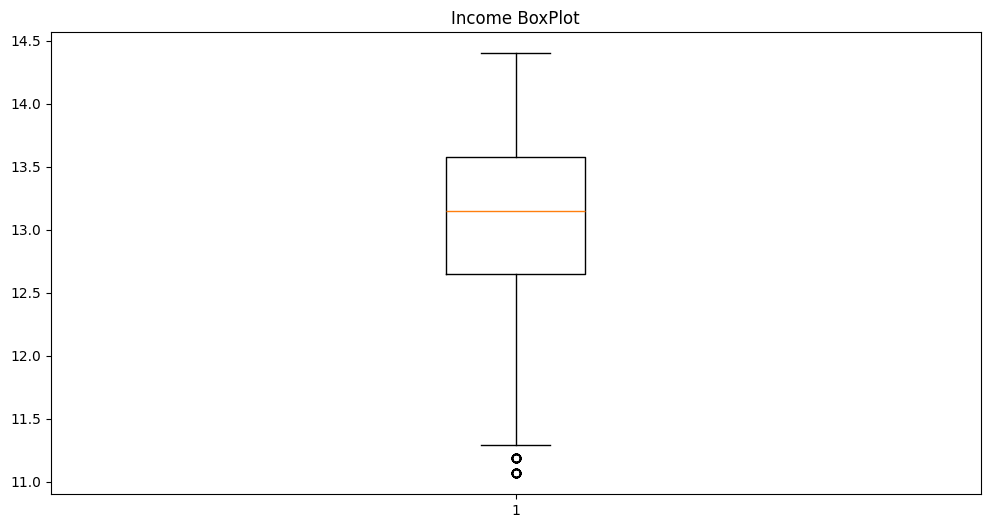

In [26]:
plt.figure(figsize=(12,6))
plt.title("Income BoxPlot")
plt.boxplot(df['Income'])

As we can see, the outliers have been reduced and the plot is no longer skewed.

Coming on to Mortgage feature

Let us plot the BoxPlot of Mortgage this time

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5ba08a5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5ba08a9c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5ba08a330>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5ba08af00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5ba08b140>],
 'means': []}

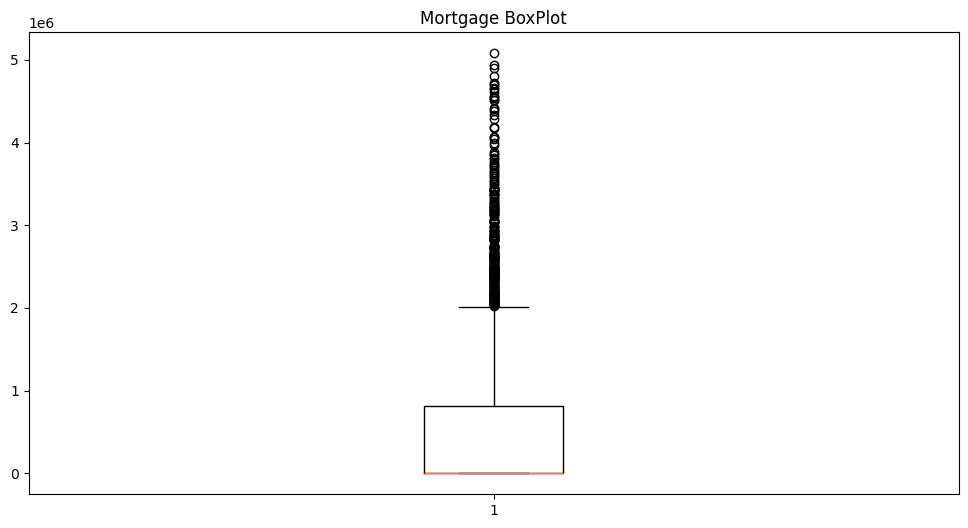

In [27]:
plt.figure(figsize=(12,6))
plt.title("Mortgage BoxPlot")
plt.boxplot(df['Mortgage'])

This plot means the presence of numerous outliers

Presence of outliers impacts linear models severely.<br>
We apply the same steps as above

In [28]:
df['Mortgage'] = df['Mortgage'].apply(lambda x: np.log1p(x))

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5baff8440>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5baff89e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5baff82f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5baff8f20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5baff91c0>],
 'means': []}

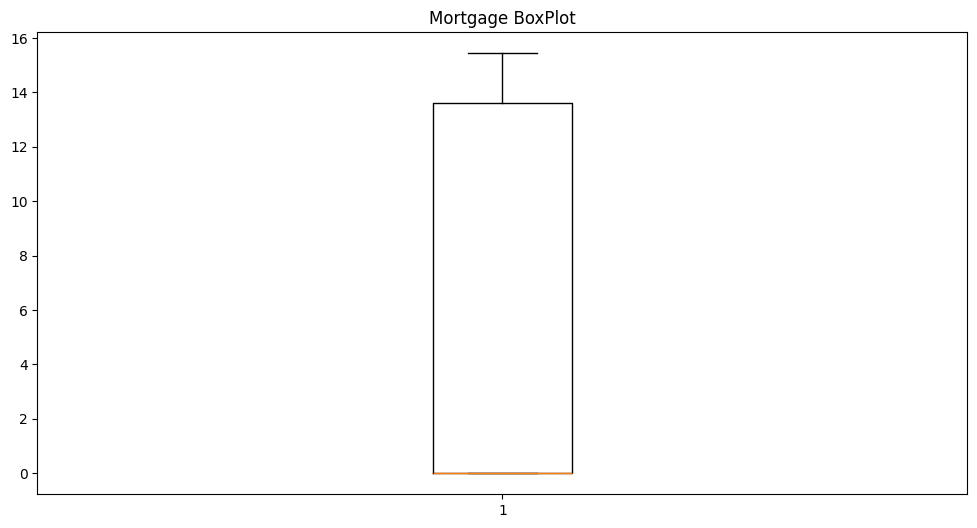

In [29]:
plt.figure(figsize=(12,6))
plt.title("Mortgage BoxPlot")
plt.boxplot(df['Mortgage'])

All the outliers have been handled.

## Preprocessing the dataset

Now that we have finished EDA and gained valuable insights, now its time to begin preprocessing

Splitting the target variable "Loan" from the main dataset

In [30]:
target = df['Loan']
features = df.drop(columns=['Income Category', 'Loan', 'ID', 'Pin-code'])

Verifying the split

In [31]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Loan
Non-Null Count  Dtype
--------------  -----
5000 non-null   int32
dtypes: int32(1)
memory usage: 19.7 KB


In [32]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   int64  
 1   Fam members               5000 non-null   float64
 2   T.Experience              5000 non-null   float64
 3   Income                    5000 non-null   float64
 4   Mortgage                  5000 non-null   float64
 5   Fixed Deposit             5000 non-null   int32  
 6   Demat                     5000 non-null   int32  
 7   Net Banking               5000 non-null   int32  
 8   Education_Graduate        5000 non-null   int64  
 9   Education_Post Graduate   5000 non-null   int64  
 10  Education_Under Graduate  5000 non-null   int64  
dtypes: float64(4), int32(3), int64(4)
memory usage: 371.2 KB


In [33]:
features.head()

,age,Fam members,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Education_Graduate,Education_Post Graduate,Education_Under Graduate
0,23,4.0,1.0,12.879020,0.0,0,1,0,0,0,1
1,43,3.0,19.0,12.513561,0.0,0,1,0,0,0,1
2,37,1.0,15.0,11.385103,0.0,0,0,0,0,0,1
3,33,1.0,9.0,13.592368,0.0,0,0,0,1,0,0
4,33,4.0,8.0,12.793862,0.0,0,0,0,1,0,0


Splitting the dataset into Train-Test Pairs

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=30)

Verifying the split

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 1237 to 4517
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       4000 non-null   int64  
 1   Fam members               4000 non-null   float64
 2   T.Experience              4000 non-null   float64
 3   Income                    4000 non-null   float64
 4   Mortgage                  4000 non-null   float64
 5   Fixed Deposit             4000 non-null   int32  
 6   Demat                     4000 non-null   int32  
 7   Net Banking               4000 non-null   int32  
 8   Education_Graduate        4000 non-null   int64  
 9   Education_Post Graduate   4000 non-null   int64  
 10  Education_Under Graduate  4000 non-null   int64  
dtypes: float64(4), int32(3), int64(4)
memory usage: 328.1 KB


In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2192 to 3550
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1000 non-null   int64  
 1   Fam members               1000 non-null   float64
 2   T.Experience              1000 non-null   float64
 3   Income                    1000 non-null   float64
 4   Mortgage                  1000 non-null   float64
 5   Fixed Deposit             1000 non-null   int32  
 6   Demat                     1000 non-null   int32  
 7   Net Banking               1000 non-null   int32  
 8   Education_Graduate        1000 non-null   int64  
 9   Education_Post Graduate   1000 non-null   int64  
 10  Education_Under Graduate  1000 non-null   int64  
dtypes: float64(4), int32(3), int64(4)
memory usage: 82.0 KB


In [37]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 4000 entries, 1237 to 4517
Series name: Loan
Non-Null Count  Dtype
--------------  -----
4000 non-null   int32
dtypes: int32(1)
memory usage: 46.9 KB


In [38]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 1000 entries, 2192 to 3550
Series name: Loan
Non-Null Count  Dtype
--------------  -----
1000 non-null   int32
dtypes: int32(1)
memory usage: 11.7 KB


The Train-Test pairs both add up to the original rows, i.e. 5000.

The splits were successful.

## Building the model

#### First, lets prepare a baseline model

## Logistic Regression

In [39]:
# We will now initialize and train the model
model = LogisticRegression(max_iter=500)

In [40]:
#Fitting the model on split data
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [41]:
# Predictions and evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.97


Logistic Regression gives a 97% accuracy!<br>

Although the model is already so accurate with default parameters, we can employ advanced features such as grid search and polynomial features to help model capture complex, non-linear relationship between the features.

Now lets try different models to find the best accuracy across all different models

#### Decision Tree

In [42]:
tree = DecisionTreeClassifier(random_state=30)
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],           
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],        
    'max_features': [None, 'sqrt', 'log2'],    
    'splitter': ['best', 'random'],           
    'criterion': ['gini', 'entropy']           
}
grid_search_tree = GridSearchCV(estimator=tree, param_grid=param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)
print("Best Parameters:", grid_search_tree.best_params_)
print("Best Accuracy:", grid_search_tree.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
Best Accuracy: 0.9800000000000001


We found the best parameters for Decision Tree

### Random Forest

Next model we will fit is random forest ensemble

In [43]:
rf = RandomForestClassifier(random_state=30)
param_grid_rf = {
    'n_estimators': [100, 200],                
    'max_depth': [None, 10, 20],              
    'min_samples_split': [2, 5],              
    'min_samples_leaf': [1, 2],               
    'max_features': ['sqrt', 'log2'],         
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Accuracy:", grid_search_rf.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.9817499999999999


### Scaling data

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Voting Classifier

Using the best parameters from all the different models used till now to make the model more accurate

In [45]:
# Choosing base models
logreg = LogisticRegression(C=1, max_iter=200, penalty='l1', solver='liblinear')
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter='best')
forest = RandomForestClassifier(max_features='sqrt', n_estimators=200)
#nn = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(100, ), max_iter=2000)
voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('tree', tree),
    ('forest', forest)
], voting='soft')
voting_clf.fit(X_train_scaled, y_train)
y_pred = voting_clf.predict(X_test_scaled)
print(f'Voting Classifier Accuracy: {accuracy_score(y_test, y_pred)}')

Voting Classifier Accuracy: 0.982


## Applying polynomial features 

to Logistic Regression to capture complex relationships 

In [46]:
polynomial_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),  
    ('logistic', LogisticRegression(solver='liblinear'))
])

polynomial_pipeline.fit(X_train, y_train)
y_pred = polynomial_pipeline.predict(X_test)

print(f'Accuracy with Polynomial Features: {accuracy_score(y_test, y_pred)}')

Accuracy with Polynomial Features: 0.986


This is the highest accuracy we have achieved out of all the models.

## Conclusion

1. Income, Fixed Deposits and Mortgage are the most important variables as they show high correlation with Loan.

## Income > Fixed Deposit > Mortgage
<pre>       as feature importance ranking
</pre>
2. Logistic Regression algorithm with fine tuning showed 98.6% accuracy

# Thank You
<img src = "thanku.bmp" align = center>

#### Submitted for the AI Fusion '24 hackathon by Anshuman Singh
##### Team Onomatopoeia